# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95



In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="SGD")

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'valid-loss': valid_loss,
        'train-acc': train_acc,
        'valid-acc': valid_acc
    }


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.2503 - accuracy: 0.5614 - val_loss: 1.4727 - val_accuracy: 0.4738
Epoch 50/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2415 - accuracy: 0.5613 - val_loss: 1.4034 - val_accuracy: 0.5024
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.2599 - accuracy: 0.5589 - val_loss: 1.4725 - val_accuracy: 0.4727
Epoch 48/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.2525 - accuracy: 0.5598 - val_loss: 1.5756 - val_accuracy: 0.4554
Epoch 49/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2415 - accuracy: 0.5641 - val_loss: 1.4382 - val_accuracy: 0.4843
Epoch 50/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.2365 - accuracy: 0.5675 - val_loss: 1.4554 - val_accuracy: 0.4865
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2636 - accuracy: 0.5590 - val_loss: 1.4596 - val_accuracy: 0.4903
Epoch 46/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2565 - accuracy: 0.5592 - val_loss: 1.4484 - val_accuracy: 0.4837
Epoch 47/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2507 - accuracy: 0.5619 - val_loss: 1.3696 - val_accuracy: 0.5144
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2460 - accuracy: 0.5648 - val_loss: 1.4465 - val_accuracy: 0.4892
Epoch 49/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2384 - accuracy: 0.5674 - val_loss: 1.4042 - val_accuracy: 0.5003
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2266 - accuracy: 0.5721 - val_loss: 1.5640 - val_accuracy: 0.4678
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2883 - accuracy: 0.5498 - val_loss: 1.4647 - val_accuracy: 0.4784
Epoch 44/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2814 - accuracy: 0.5516 - val_loss: 1.3970 - val_accuracy: 0.5011
Epoch 45/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2704 - accuracy: 0.5560 - val_loss: 1.4246 - val_accuracy: 0.4942
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.2651 - accuracy: 0.5555 - val_loss: 1.4706 - val_accuracy: 0.4879
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.2587 - accuracy: 0.5574 - val_loss: 1.5172 - val_accuracy: 0.4797
Epoch 48/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2487 - accuracy: 0.5618 - val_loss: 1.3644 - val_accuracy: 0.5169
Epoch 49/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2439 - accuracy: 0.5645

Epoch 41/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.2837 - accuracy: 0.5507 - val_loss: 1.4715 - val_accuracy: 0.4895
Epoch 42/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.2793 - accuracy: 0.5507 - val_loss: 1.4373 - val_accuracy: 0.4927
Epoch 43/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2689 - accuracy: 0.5544 - val_loss: 1.4193 - val_accuracy: 0.4911
Epoch 44/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2687 - accuracy: 0.5555 - val_loss: 1.5280 - val_accuracy: 0.4621
Epoch 45/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2589 - accuracy: 0.5596 - val_loss: 1.3956 - val_accuracy: 0.4987
Epoch 46/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.2558 - accuracy: 0.5603 - val_loss: 1.6171 - val_accuracy: 0.4278
Epoch 47/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2485 - accuracy: 0.5617

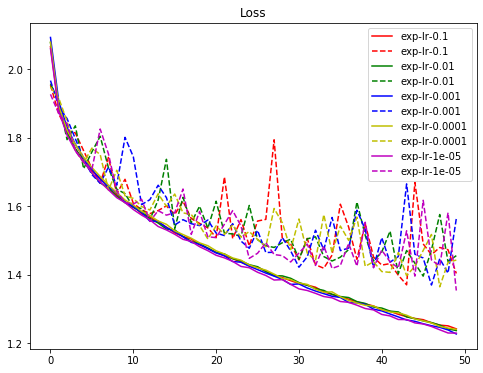

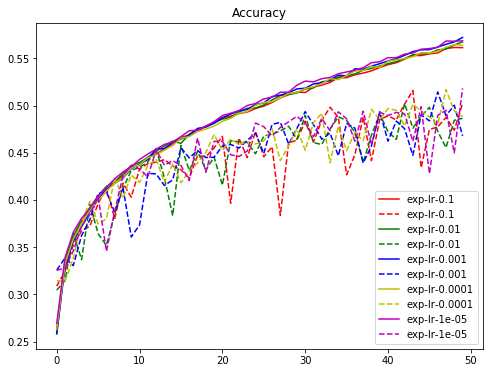

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="RMSprop")

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'valid-loss': valid_loss,
        'train-acc': train_acc,
        'valid-acc': valid_acc
    }


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 7s 134us/step - loss: 0.8095 - accuracy: 0.7082 - val_loss: 1.8751 - val_accuracy: 0.4833
Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.7981 - accuracy: 0.7124 - val_loss: 1.8844 - val_accuracy: 0.4919
Epoch 50/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.7878 - accuracy: 0.7162 - val_loss: 1.9148 - val_accuracy: 0.4863
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 6s 124us/step - loss: 0.8383 - accuracy: 0.6988 - val_loss: 1.7412 - val_accuracy: 0.4906
Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.8241 - accuracy: 0.7027 - val_loss: 1.7747 - val_accuracy: 0.4992
Epoch 47/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.8127 - accuracy: 0.7080 - val_loss: 1.8251 - val_accuracy: 0.4948
Epoch 48/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.7940 - accuracy: 0.7139 - val_loss: 1.9906 - val_accuracy: 0.4725
Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.7875 - accuracy: 0.7178 - val_loss: 1.9308 - val_accuracy: 0.4743
Epoch 50/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.7784 - accuracy: 0.7182 - val_loss: 1.9063 - val_accuracy: 0.4723
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer

Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8262 - accuracy: 0.7029 - val_loss: 2.1074 - val_accuracy: 0.4412
Epoch 44/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.8176 - accuracy: 0.7058 - val_loss: 2.0929 - val_accuracy: 0.4607
Epoch 45/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8061 - accuracy: 0.7077 - val_loss: 1.9499 - val_accuracy: 0.4427
Epoch 46/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7906 - accuracy: 0.7146 - val_loss: 1.8028 - val_accuracy: 0.4834
Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.7745 - accuracy: 0.7222 - val_loss: 1.8081 - val_accuracy: 0.4907
Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7707 - accuracy: 0.7231 - val_loss: 2.0306 - val_accuracy: 0.4812
Epoch 49/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.7560 - accuracy: 0.7278

50000/50000 [==============================] - 6s 125us/step - loss: 0.8994 - accuracy: 0.6774 - val_loss: 1.9371 - val_accuracy: 0.4406
Epoch 41/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.8892 - accuracy: 0.6803 - val_loss: 1.7267 - val_accuracy: 0.4819
Epoch 42/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.8776 - accuracy: 0.6837 - val_loss: 1.8486 - val_accuracy: 0.47570s - loss: 0.876
Epoch 43/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.8591 - accuracy: 0.6899 - val_loss: 1.9352 - val_accuracy: 0.4732
Epoch 44/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.8475 - accuracy: 0.6960 - val_loss: 1.7845 - val_accuracy: 0.4910
Epoch 45/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.8350 - accuracy: 0.7000 - val_loss: 1.8072 - val_accuracy: 0.4756
Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.8264 - accuracy: 0.

50000/50000 [==============================] - 6s 127us/step - loss: 0.9293 - accuracy: 0.6675 - val_loss: 1.9266 - val_accuracy: 0.4699
Epoch 38/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.9225 - accuracy: 0.6691 - val_loss: 1.7395 - val_accuracy: 0.4894
Epoch 39/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.9100 - accuracy: 0.6725 - val_loss: 1.8302 - val_accuracy: 0.4621
Epoch 40/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8973 - accuracy: 0.6783 - val_loss: 1.8585 - val_accuracy: 0.4824
Epoch 41/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8796 - accuracy: 0.6853 - val_loss: 1.8095 - val_accuracy: 0.4808
Epoch 42/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8663 - accuracy: 0.6882 - val_loss: 1.7789 - val_accuracy: 0.4801
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8541 - accuracy: 0.6940 - val_loss:

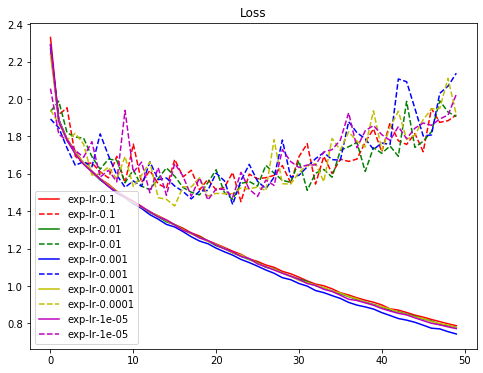

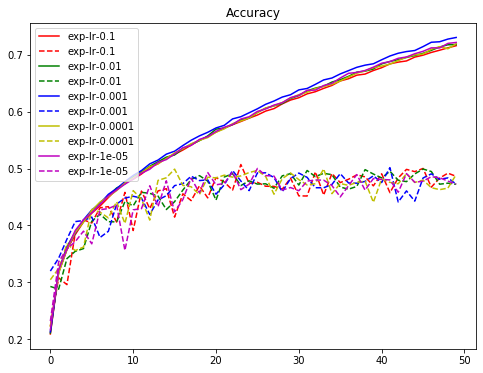

In [10]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="AdaGrad")

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'valid-loss': valid_loss,
        'train-acc': train_acc,
        'valid-acc': valid_acc
    }


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0829 - accuracy: 0.6184 - val_loss: 1.3900 - val_accuracy: 0.5188
Epoch 50/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0762 - accuracy: 0.6241 - val_loss: 1.4002 - val_accuracy: 0.5192
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0596 - accuracy: 0.6303 - val_loss: 1.3806 - val_accuracy: 0.5214
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0508 - accuracy: 0.6358 - val_loss: 1.3545 - val_accuracy: 0.5311
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0428 - accuracy: 0.6388 - val_loss: 1.3903 - val_accuracy: 0.5178
Epoch 50/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.0378 - accuracy: 0.6402 - val_loss: 1.4702 - val_accuracy: 0.4934
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1096 - accuracy: 0.6091 - val_loss: 1.4283 - val_accuracy: 0.5072
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1060 - accuracy: 0.6132 - val_loss: 1.4264 - val_accuracy: 0.5062
Epoch 47/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0981 - accuracy: 0.6138 - val_loss: 1.3922 - val_accuracy: 0.5163
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0897 - accuracy: 0.6176 - val_loss: 1.3868 - val_accuracy: 0.5125
Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0852 - accuracy: 0.6185 - val_loss: 1.3907 - val_accuracy: 0.5070
Epoch 50/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0769 - accuracy: 0.6236 - val_loss: 1.4074 - val_accuracy: 0.5082
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0875 - accuracy: 0.6192 - val_loss: 1.3657 - val_accuracy: 0.5272
Epoch 44/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0809 - accuracy: 0.6219 - val_loss: 1.3444 - val_accuracy: 0.5258
Epoch 45/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0693 - accuracy: 0.6254 - val_loss: 1.3813 - val_accuracy: 0.5218
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0659 - accuracy: 0.6271 - val_loss: 1.3653 - val_accuracy: 0.5272
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0572 - accuracy: 0.6318 - val_loss: 1.3476 - val_accuracy: 0.5339
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0469 - accuracy: 0.6336 - val_loss: 1.3842 - val_accuracy: 0.5176
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0421 - accuracy: 0.6368

Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1215 - accuracy: 0.6075 - val_loss: 1.4062 - val_accuracy: 0.5061
Epoch 42/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1150 - accuracy: 0.6091 - val_loss: 1.3567 - val_accuracy: 0.5285
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1047 - accuracy: 0.6134 - val_loss: 1.3968 - val_accuracy: 0.5137
Epoch 44/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0987 - accuracy: 0.6161 - val_loss: 1.3899 - val_accuracy: 0.5218
Epoch 45/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.0916 - accuracy: 0.6182 - val_loss: 1.3581 - val_accuracy: 0.5276
Epoch 46/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0828 - accuracy: 0.6224 - val_loss: 1.3842 - val_accuracy: 0.5150
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0752 - accuracy: 0.6234

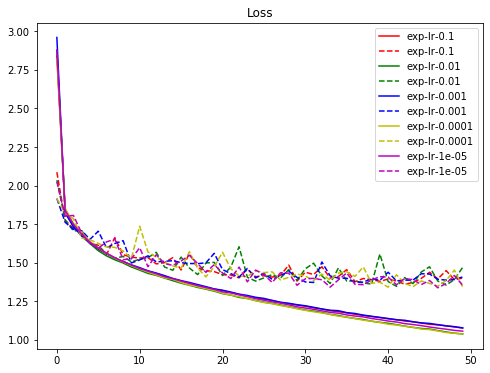

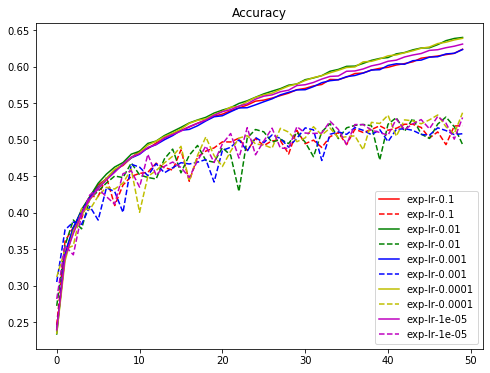

In [12]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'valid-loss': valid_loss,
        'train-acc': train_acc,
        'valid-acc': valid_acc
    }


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6562 - accuracy: 0.7653 - val_loss: 1.7137 - val_accuracy: 0.5199
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.6337 - accuracy: 0.7719 - val_loss: 1.7514 - val_accuracy: 0.5242
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6799 - accuracy: 0.7547 - val_loss: 1.6690 - val_accuracy: 0.5197
Epoch 48/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.6733 - accuracy: 0.7592 - val_loss: 1.7123 - val_accuracy: 0.5222
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6603 - accuracy: 0.7634 - val_loss: 1.7289 - val_accuracy: 0.5185
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6496 - accuracy: 0.7681 - val_loss: 1.7807 - val_accuracy: 0.5142
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7588 - accuracy: 0.7274 - val_loss: 1.6382 - val_accuracy: 0.5219
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7349 - accuracy: 0.7378 - val_loss: 1.6569 - val_accuracy: 0.5170
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7210 - accuracy: 0.7405 - val_loss: 1.6782 - val_accuracy: 0.5188
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7124 - accuracy: 0.7446 - val_loss: 1.6473 - val_accuracy: 0.5251
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7062 - accuracy: 0.7457 - val_loss: 1.6715 - val_accuracy: 0.5216
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6842 - accuracy: 0.7559 - val_loss: 1.7595 - val_accuracy: 0.5192
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7379 - accuracy: 0.7362 - val_loss: 1.6297 - val_accuracy: 0.5173
Epoch 44/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7139 - accuracy: 0.7470 - val_loss: 1.7144 - val_accuracy: 0.5152
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6923 - accuracy: 0.7533 - val_loss: 1.6345 - val_accuracy: 0.5227
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6795 - accuracy: 0.7579 - val_loss: 1.7162 - val_accuracy: 0.5161
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6741 - accuracy: 0.7600 - val_loss: 1.7472 - val_accuracy: 0.5162
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6615 - accuracy: 0.7653 - val_loss: 1.8234 - val_accuracy: 0.5019
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6504 - accuracy: 0.7665

Epoch 41/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7928 - accuracy: 0.7175 - val_loss: 1.5603 - val_accuracy: 0.5210
Epoch 42/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.7742 - accuracy: 0.7236 - val_loss: 1.5703 - val_accuracy: 0.5219
Epoch 43/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7559 - accuracy: 0.7293 - val_loss: 1.6212 - val_accuracy: 0.5228
Epoch 44/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7343 - accuracy: 0.7378 - val_loss: 1.6154 - val_accuracy: 0.5141
Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7383 - accuracy: 0.7339 - val_loss: 1.6261 - val_accuracy: 0.5176
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7235 - accuracy: 0.7412 - val_loss: 1.6406 - val_accuracy: 0.5260
Epoch 47/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7089 - accuracy: 0.7452

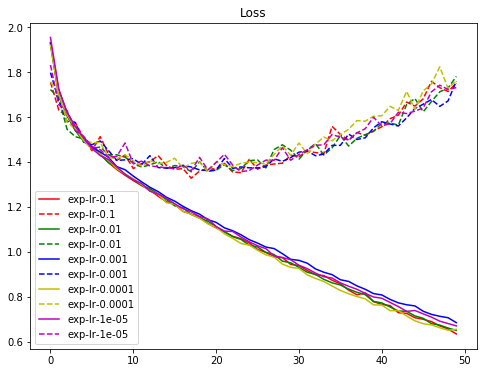

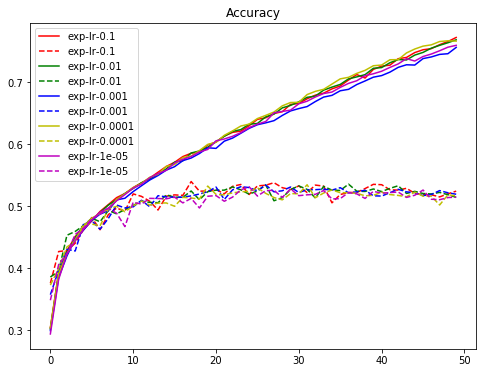

In [14]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()